# ACM-ICPC 2010 日本国内予選 問題B: 迷図と命ず

## 問題の説明

公式の過去問は[こちら](https://icpc.iisf.or.jp/past-icpc/domestic2010/#section_B)で公開されているので，問題の説明は省略する．
非常にざっくり説明すると，

- 迷図（迷路）が与えられるので，通り抜けるための最短の歩数を答えよ，
- ただし，通り抜けられない迷図の場合には0と答えよ，

という問題である．

この問題は，典型的な**グラフ上の最短路問題**である．
グラフ上の最短路問題は**幅優先探索**を用いることで時間複雑度$\mathrm{O}(n + m)$で解けることが知られている．
ただしここで$n$はグラフの頂点数，$m$はグラフのエッジ数である．

以下に，ファイル入出力用の解答例のコードを示す．

## NetworkXをフルに使う解法

グラフ上の最短路問題は典型的な問題なので，NetworkXの関数を使えば解ける．
まずは，問題文の最初の迷図をグラフで表してみる．

In [ ]:
import networkx as nx

G = nx.Graph() # この命令で空の（頂点もエッジもない）グラフをGとする．
G.add_node((0, 0), position=(0, 2)) # 一番左上の頂点名を(0, 0)とし，その座標を(0, 2)とする．
G.add_node((0, 1), position=(1, 2))
G.add_node((1, 0), position=(0, 1))
G.add_node((1, 1), position=(1, 1))
G.add_node((2, 0), position=(0, 0))
G.add_node((2, 1), position=(1, 0)) # 一番右下の頂点名を(2, 1)とし，その座標を(1, 2)とする．
G.add_edge((0, 0), (1, 0)) # 頂点(0, 0)と頂点(1, 0)は隣接している．
G.add_edge((1, 0), (1, 1)) # 頂点(1, 0)と頂点(1, 1)は隣接している．
G.add_edge((1, 1), (2, 1)) # 頂点(1, 1)と頂点(2, 1)は隣接している．

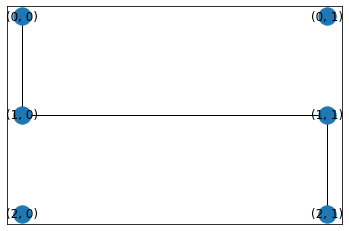

In [ ]:
# 実はGoogle colaboratoryの場合，matplotlibをimportしなくても描画できる．
%matplotlib inline
nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'position')) 
# NetworkXの関数get_node_attributesを使うと，グラフGの頂点名をキー，キーワードの値を辞書の値とする辞書を得られる．

描画すると，この通りである．
見るからに，頂点(0,0)から頂点(2,1)へのグラフ上の距離は3であり，迷図の問題設定からは，4歩で迷図を抜けられることがわかる．

NetworkXには最短路長を返す関数[shortest_path_length](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length)があるので，それを使えばグラフ上の最短路長が得られる．
```py
nx.shortest_path_length(G, source, target)
```
でグラフGにおけるsourceからtargetへの最短路長が得られる．
では，早速使ってみよう．

In [ ]:
nx.shortest_path_length(G, (0, 0), (2, 1)) + 1 # 迷図の問題設定上，グラフ上の最短路長+1を答える．

4

確かに，正答が得られた．
（グラフが簡素すぎるので，これで正答と言われても困惑するかも知れないが．）

なお，NetworkXの関数shortest_path_lengthは，グラフのエッジに長さが設定されている場合でも最短路長を返してくれる，より一般的な関数である．
そしてその一般的な機能を実現するため，内部のアルゴリズムとして幅優先探索ではなくダイクストラ法（Dijkstra's algorithm）を採用している．
ダイクストラ法の時間複雑度は一般に$\mathrm{O}(n + m)$よりも大きいが，現在扱っている問題程度のグラフの大きさならば幅優先探索と大差ないので気にしないことにする．

あと，今回扱っている問題の設定では，迷図は抜けられるとは限らない．
グラフの2頂点間にパスがあるかを判定する関数[has_path](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.has_path.html#networkx.algorithms.shortest_paths.generic.has_path)も使うことにする．

以上を踏まえて以下に，NetworkXをフルに使ってこの問題を解く，ファイル入出力版の関数answerを定義する．

In [ ]:
def answer(input_file_name, output_file_name):
    input_file = open(input_file_name)
    output_file = open(output_file_name, 'w')
    while True:
        w, h = map(int, input_file.readline().split()) # wとｈを迷図の幅と高さとする．
        if w == 0 and h == 0: # 幅も高さも0ならば，
            break # 繰り返しを終える．
        G = nx.Graph() # 空のグラフをGとする．
        for i in range(h): # 迷図のそれぞれの縦位置iと，
            for j in range(w): # 横位置jに関して，
                G.add_node((i, j)) # そのマス目に対応する頂点(i, j)をグラフに加える．
        for i in range(h): # 迷図のそれぞれの縦位置iに関して，
            line = list(map(int, input_file.readline().split())) # 横移動を阻む壁のデータを1行読み込み，
            for j in range(w - 1): # そのそれぞれの横位置jに関して，
                if line[j] == 0: # 右側に壁がないならば，右側との移動が可能なので，
                    G.add_edge((i, j), (i, j + 1)) # 頂点(i, j)と頂点(i, j + 1)をエッジで結ぶ．
            if i >= h - 1: continue # 以降は縦方向の移動に関するエッジの処理だが，縦位置が（０始まりなので）h-1だとそれよりも下がないので，以降の処理を省略する．
            line = list(map(int, input_file.readline().split())) # 縦移動を阻む壁のデータを１行読み込み，
            for j in range(w): # そのそれぞれの横位置jに関して，
                if line[j] == 0: # 下側に壁がないならば，下側との移動が可能なので，
                    G.add_edge((i, j), (i + 1, j)) # 頂点(i, j)と頂点(i + 1, j)をエッジで結ぶ．
        source = (0, 0) # 迷図の始点は常に(0, 0)
        target = (h - 1, w - 1) # 迷図の終点は常に(h - 1, w - 1)
        if nx.has_path(G, source, target) == False: # まず，始点から終点へのパスがないならば，
            output_file.write('0\n') # ファイルに0と出力する．
        else: # そうではなく，始点から終点へのパスがあるならば，
            output_file.write(f'{nx.shortest_path_length(G, source, target) + 1}\n') # 始点から終点への，グラフ上の距離（最短路長）+1をファイルに出力する．
    input_file.close()
    output_file.close()
    return

では，このプログラムを実行してみよう．
入力データのファイルは公式サイトに置かれているので，それをダウンロードすればよい．
ACM-ICPC 2010 日本国内予選の入力データはまとめて[ここ](https://icpc.iisf.or.jp/past-icpc/domestic2010/qualify_judge.zip)にあるので，それをダウンロードする．

Google colaboratoryにおいてファイルを読み込んだりファイルに書き込んだりするためには，Googleドライブをマウントするのが最も簡単であろう．
以降では，その方法でプログラムを実行してみる．

まず，以下の命令でGoogleドライブをマウントする．
以下の命令を実行すると，Googleアカウントの選択やコード入力を求められるが，その説明はここでは省略する．

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


適切にGoogleアカウントを選択し正しいコードを入力すると，選択されたGoogleアカウントのGoogleドライブがマウントされる．
マウントしたら，ファイル入出力プログラムの実行をできるし，他にもUNIXコマンドの実行もできる．

例えば，私は自分のGoogleドライブのディレクトリ
```
python/acm_icpc/domestic2010/qualify_judge
```
に公式からダウンロードして展開（解凍）したファイルを置いた．

Google colaboratoryのコードセルでは，
```
!UNIXコマンド
```
でUNIXコマンドを実行できるので，UNIXのlsコマンドでファイルを確認してみる．

In [ ]:
!ls /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B*

'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B1'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B1.ans'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B2'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B2.ans'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B3'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B3.ans'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B4'
'/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/B4.ans'


B1, B1.ans, B2, B2.ans, B3, B3.ans, B4, B4.ans
の4つのファイルを確認できた．
B1, B2, B3, B4が，プログラミングコンテストで使われた入力データのファイルであり，B1.ans, B2.ans, B3.ans, B4.ansがそれぞれ入力データに対応する正解の出力データのファイルである．

B1, B2, B3, B4をそれぞれ先程定義した関数answerに入力し，そこで得られた出力データのファイルをB1.out, B2.out, B3.out, B4.outとして同じディレクトリに保存するコードを以下に記し実行する．

In [ ]:
input_file_names = ['B1', 'B2', 'B3', 'B4']
file_dir = '/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/'
for input_file_name in input_file_names:
    answer(f'{file_dir}{input_file_name}', f'{file_dir}{input_file_name}.out')

何も表示されないが，きっと実行されたに違いない．

UNIXのdiffコマンドを用いて，B1.out, B2.out, B3.out, B4.outのそれぞれを，B1.ans, B2.ans, B3.ans, B4.ansと比較してみる．

In [ ]:
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B1.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B1.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B2.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B2.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B3.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B3.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B4.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B4.ans

差分は何も表示されないので，関数answerの出力ファイルと正解のファイルは完全に一致している．

## NetworkXをデータ構造としてのみ利用する解法

NetworkXの関数を利用するのは便利だが，アルゴリズムをカスタマイズしたい，あるいはアルゴリズムを自作したい場合もある．
ここでは，そのような場合に備えて，データ構造としてのみNetworkXを用いて，グラフ上の最短路長を計算する関数を自作する．

グラフ上の最短路長は先述の通り幅優先探索で求まる．

以下に，幅優先探索でグラフ上の最短路長を求める関数をshortest_path_length_with_nxとして定義する．

In [ ]:
def shortest_path_length_with_nx(G, source, target):
    '''グラフ上の距離（最短路長）を返す関数
    入力は，グラフG，始点source，終点target，
    出力は，始点から終点へのグラフ上の距離，ただし始点と終点が同じ連結成分に含まれていない場合には-1'''
    C = set([source]) # 始点から到達可能であることがわかっている頂点集合をCとする．最初は始点のみが始点から到達可能であるとわかっている．
    queue = [source] # 幅優先探索なのでqueueに「探索境界上の頂点集合」を覚える．
    dist = {source: 0} # 始点からの距離をdistとする．最初は始点の，始点からの距離が0であることだけがわかっている．
    while len(queue) > 0: # queueに覚えられている「探索境界上の頂点」がある限り，以下を繰り返す．
        v = queue.pop(0) # 探索境界上の頂点を1つ抜き出す．
        for w in G.neighbors(v): # その頂点の隣接頂点wに関して，
            if w not in C: # wがすでに探索済みでないならば，
                C |= set([w]) # 始点から到達可能であることを覚えて，
                queue.append(w) # 「探索境界上の頂点」として覚えて，
                dist[w] = dist[v] + 1 # 「頂点vへの距離+1」をその頂点wの距離とする．
    if target in C: # 終点が探索済みならば，始点と同じ連結成分に含まれているということなので，
        return dist[target] # 始点からの距離を返す．
    return -1 # そうでないならば，始点と終点が同じ連結成分に含まれていないということなので-1を返す．

この自作の関数shortest_path_length_without_nxを用いて問題を解くファイル入出力版の関数answer2を以下に定義する．
上述の関数answerと同じコメントは省く．

なお，ここで，ファイルを開く際に[with構文](https://docs.python.org/ja/3/reference/compound_stmts.html#with)を使ってみる．

In [ ]:
def answer2(input_file_name, output_file_name):
    with open(input_file_name) as input_file, open(output_file_name, 'w') as output_file:
        while True:
            w, h = map(int, input_file.readline().split())
            if w == 0 and h == 0:
                break
            G = nx.Graph()
            for i in range(h):
                for j in range(w):
                    G.add_node((i, j))
            for i in range(h):
                line = list(map(int, input_file.readline().split()))
                for j in range(w - 1):
                    if line[j] == 0:
                        G.add_edge((i, j), (i, j + 1))
                if i >= h - 1: continue
                line = list(map(int, input_file.readline().split()))
                for j in range(w):
                    if line[j] == 0:
                        G.add_edge((i, j), (i + 1, j))
            source = (0, 0)
            target = (h - 1, w - 1)
            # 始点から終点への，グラフ上の距離（最短路長）+1をファイルに出力する．
            output_file.write(f'{shortest_path_length_with_nx(G, source, target) + 1}\n') # answerとはここの部分が異なる
            # 始点から終点へ到達できない場合には-1を返すように定義したので，偶然にも（笑），上の1行だけで良くなった．
    return

このコード例で何となくわかっていただけたと思うが，

```py
f = open(file_name, mode)
処理
f.close()
```
は
```py
with open(file_name, mode) as f:
    処理
```
と書いても同じように処理される．
`f.close()`はどこへ行った？
と思われるかも知れないが，withを使うと，それは自動的に実行される．
with構文はファイルを開く場合以外にも使える一般的なものであるが，この講義ではそれ以外の用途では使いそうにないので，その説明は省略する．

また，withでファイルを開いて，そのファイルを読み書きできる範囲はインデントで示すので，複数のファイルを開く場合には，
```py
with open(file_name1, mode1) as f1:
    with open(file_name2, mode2) as f2:
        処理
```
という具合に書く．
しかし，この書き方だと複数のファイルを開く場合にはインデントが深くなってしまいがちなので，
```py
with open(file_name1, mode1) as f1, open(file_name2, mode2) as f2:
    処理
```
でも同じ役割を果たせるようになっている．

念の為に実行して確認してみる．

In [ ]:
input_file_names = ['B1', 'B2', 'B3', 'B4']
file_dir = '/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/'
for input_file_name in input_file_names:
    answer2(f'{file_dir}{input_file_name}', f'{file_dir}{input_file_name}.out')

In [ ]:
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B1.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B1.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B2.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B2.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B3.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B3.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B4.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B4.ans

今度も，差分は何も表示されないので，関数answerの出力ファイルと正解のファイルは完全に一致している．

## NetworkXを全く使わない解法

ここまで見てわかるように，幅優先探索で必要とされるグラフ操作は「指定された頂点vの隣接頂点を参照すること」だけである．

これならば，グラフを頂点隣接リストで保存すれば十分である．

以下に，グラフを頂点隣接リストで保存する前提で，関数shortest_path_length_without_nxとanswer3を定義する．

In [ ]:
def shortest_path_length_without_nx(G, source, target):
    '''グラフ上の距離（最短路長）を返す関数
    入力は，グラフG，始点source，終点target，
    出力は，始点から終点へのグラフ上の距離，ただし始点と終点が同じ連結成分に含まれていない場合には-1'''
    # 以降，前出の関数shortest_path_length_with_nxと同じコメントは省略する．
    C = set([source])
    queue = [source]
    dist = {source: 0}
    while len(queue) > 0:
        v = queue.pop(0)
        for w in G[v]: # 違うのはここだけ！ここでGは頂点隣接リスト（の辞書による実現）であると仮定している．
            if w not in C:
                C |= set([w])
                queue.append(w)
                dist[w] = dist[v] + 1
    if target in C:
        return dist[target]
    return -1


def answer3(input_file_name, output_file_name):
    with open(input_file_name) as input_file, open(output_file_name, 'w') as output_file:
        while True:
            w, h = map(int, input_file.readline().split())
            if w == 0 and h == 0:
                break
            G = {} # 頂点隣接リスト（の辞書による実現）をGとする．
            for i in range(h):
                for j in range(w):
                    G[(i, j)] = [] # まずは，それぞれの頂点(i, j)の隣接頂点のリストを空にする．
            for i in range(h):
                line = list(map(int, input_file.readline().split()))
                for j in range(w - 1):
                    if line[j] == 0: # 頂点(i, j)の右の壁がないならば，
                        G[(i, j)].append((i, j + 1)) # 頂点(i, j)の隣接頂点のリストに頂点(i, j + 1)を加え，
                        G[(i, j + 1)].append((i, j)) # 逆に，頂点(i, j + 1)の隣接頂点のリストに頂点(i, j)を加える．
                        # このようにエッジの両端点のリストを処理する必要がないという意味で，NetworkXは便利である．
                if i >= h - 1: continue
                line = list(map(int, input_file.readline().split()))
                for j in range(w):
                    if line[j] == 0:
                        G[(i, j)].append((i + 1, j)) # 頂点(i, j)の隣接頂点のリストに頂点(i + 1, j)を加え，
                        G[(i + 1, j)].append((i, j)) # 逆に，頂点(i + 1, j)の隣接頂点のリストに頂点(i, j)を加える．
            source = (0, 0)
            target = (h - 1, w - 1)
            output_file.write(f'{shortest_path_length_without_nx(G, source, target) + 1}\n') # NetworkXを使わない関数に変更した．
    return

では，このNetworkXを使わない関数たちに関しても，その正しさを確認するために実行してみる．

In [ ]:
input_file_names = ['B1', 'B2', 'B3', 'B4']
file_dir = '/content/drive/My Drive/python/acm_icpc/domestic2010/qualify_judge/'
for input_file_name in input_file_names:
    answer3(f'{file_dir}{input_file_name}', f'{file_dir}{input_file_name}.out')

In [ ]:
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B1.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B1.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B2.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B2.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B3.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B3.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B4.out /content/drive/'My Drive'/python/acm_icpc/domestic2010/qualify_judge/B4.ans

差分は何も表示されないので，関数answerの出力ファイルと正解のファイルは完全に一致している．

最後に，上記の関数shortest_path_length_without_nxを用いて標準入出力に対応するコードを以下に示す．

In [ ]:
while True: # 先程のanswer3の繰り返し部分だけを抜き出して，標準入出力に合わせただけである．
    w, h = map(int, input().split()) # 標準入力に変更する．
    if w == 0 and h == 0:
        break
    G = {}
    for i in range(h):
        for j in range(w):
            G[(i, j)] = []
    for i in range(h):
        line = list(map(int, input().split())) # 標準入力に変更する．
        for j in range(w - 1):
            if line[j] == 0:
                G[(i, j)].append((i, j + 1))
                G[(i, j + 1)].append((i, j))
        if i >= h - 1: continue
        line = list(map(int, input().split())) # 標準入力に変更する．
        for j in range(w):
            if line[j] == 0:
                G[(i, j)].append((i + 1, j))
                G[(i + 1, j)].append((i, j))
    source = (0, 0)
    target = (h - 1, w - 1)
    print(shortest_path_length_without_nx(G, source, target) + 1) # 標準出力に変更する．

このコードが正しいか否かは，オンラインジャッジなどで確かめられる．
[AOJ](https://judge.u-aizu.ac.jp/onlinejudge/)ならば，Vol. 11の1166番である．